In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import sys
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

In [3]:
from sabreMod import sosf,sosfn,acf,sosfh
from sabre import sosfw

In [4]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [5]:
samples=pd.read_csv('Res//listdata.txt',header=None)
#samples

In [6]:
d=840000
pc=d*(4.85*10**(-6))
pc

4.074

In [7]:
i=1
samples[0][i]

'595IHB'

In [8]:
dt=pd.read_csv('Res//'+samples[0][i]+'.csv')
#dt=pd.read_csv('datos Car.csv')
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,X,Y,Center,Peak,Width,RV,Sig
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,89.000000
mean,96.225496,9.682609,6557.778517,1622.754565,0.902765,-203.480294,13.052903
std,13.058239,6.518308,0.161111,2065.544406,0.614293,7.359642,7.511131
min,75.096000,0.000000,6557.471000,85.360000,-0.948000,-217.527864,1.154918
25%,85.824000,5.000000,6557.648250,386.225000,0.914000,-209.430983,7.452495
50%,95.211000,8.000000,6557.792000,821.700000,1.003000,-202.864401,11.832402
75%,104.598000,14.000000,6557.910000,1856.250000,1.130500,-197.474093,18.574509
max,124.713000,22.000000,6558.073000,9957.000000,1.823000,-190.028160,29.060332


(72.61515, 127.19385, -1.1, 23.1)

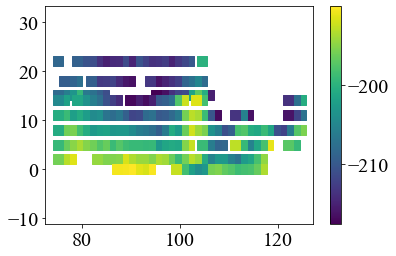

In [9]:
plt.scatter(dt.X,dt.Y,c=dt.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

(72.61515, 127.19385, -1.1, 23.1)

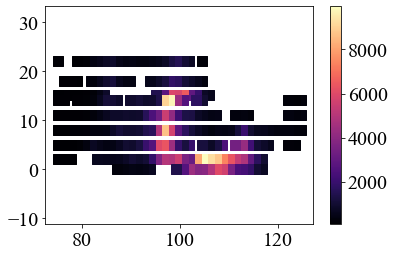

In [10]:
plt.scatter(dt.X,dt.Y,c=dt.Peak, s=100,marker='s',cmap='magma')
plt.colorbar()
plt.axis('equal')

1.0


[None, None]

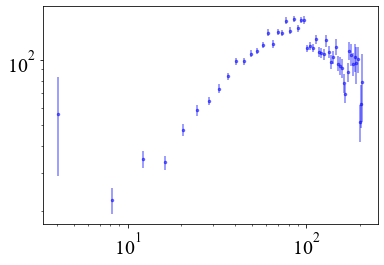

In [11]:
SF=sosf(dt)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [12]:
x=SF['Lag']
y=SF['Nmqvd']-2*(dt.RV.std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 50.33552073, 118.1554152 , 126.8595822 , 134.27636793,
       143.84088425, 148.03220363, 174.52057857, 177.67306215])

In [13]:
s=SFr[0]

In [14]:
ss=np.round(2*(dt.RV.std())**2,2)

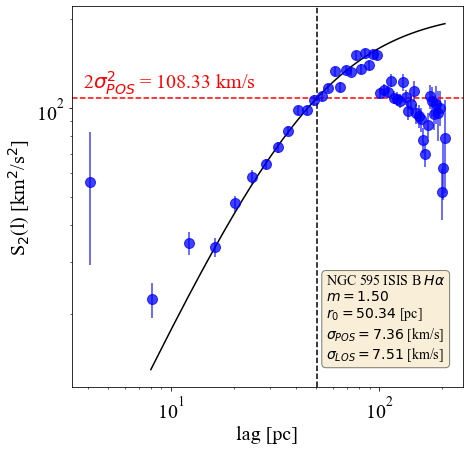

In [20]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=2*(dt.RV.std())**2, color='r', linestyle='--')
ax.text(0.25, 0.8,'2$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.5

x=np.linspace(8,int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*2*(dt.RV.std())**2

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 595 ISIS B ' r'$H\alpha$', r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (dt.RV.std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(dt.Sig.std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

fig.savefig('Img//'+samples[0][i]+'.pdf')

In [16]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 13.053457498550415 seconds ---
